In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [46]:
df=pd.read_csv("auto-mpg.csv")

In [47]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [48]:
df1=df.copy()

In [49]:
df.shape

(398, 9)

In [50]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [60]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [368]:
#Eda and Feature Engineering

In [52]:
df.duplicated().sum()

0

In [76]:
def assess_missing_data(df):
    '''
    A function to find out the missing data and its statistic information
    
    input:
    df: the data frame
    
    output:
    df_stats: the statistic information of missing column, will be missing value count and
    missing value percentage
    '''
    
    rec = []
    for column_name in df.columns:
        miss_count = df[column_name].isnull().sum(axis=0)
        miss_percent=miss_count/df.shape[0]
        rec.append([column_name,miss_count,miss_percent*100])
        df_stats = pd.DataFrame.from_records(rec, columns = ['column name', 
                                                             'missing_count','missing_percentage'])  
        df_stats = df_stats.sort_values('missing_percentage',axis=0, ascending = False )
    return df_stats

df_stats = assess_missing_data(df)

df_stats

,column name,missing_count,missing_percentage
3,horsepower,6,1.507538
0,mpg,0,0.000000
1,cylinders,0,0.000000
2,displacement,0,0.000000
4,weight,0,0.000000
5,acceleration,0,0.000000
6,model year,0,0.000000
7,origin,0,0.000000
8,car name,0,0.000000


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

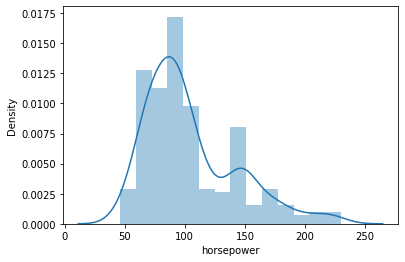

In [84]:
sns.distplot(df['horsepower'])

In [80]:
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)

<AxesSubplot:>

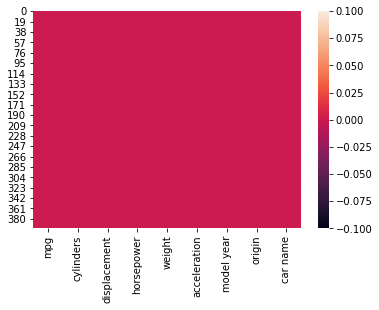

In [81]:
sns.heatmap(df.isnull())

In [54]:
df['car name'].value_counts().head(25).sort_values(ascending=False)

ford pinto                   6
amc matador                  5
ford maverick                5
toyota corolla               5
chevrolet chevette           4
amc gremlin                  4
chevrolet impala             4
peugeot 504                  4
amc hornet                   4
toyota corona                4
chevrolet nova               3
plymouth duster              3
chevrolet vega               3
ford galaxie 500             3
plymouth fury iii            3
pontiac catalina             3
honda civic                  3
chevrolet citation           3
dodge colt                   3
volkswagen dasher            3
chevrolet caprice classic    3
ford gran torino             3
amc matador (sw)             2
volkswagen rabbit            2
ford gran torino (sw)        2
Name: car name, dtype: int64

In [55]:
for col in df.columns:
    df[col].unique()

In [56]:
df['horsepower']=df['horsepower'].replace('?','')

In [57]:
df['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: horsepower, Length: 94, dtype: int64

In [62]:
df['horsepower']=pd.to_numeric(df['horsepower'])

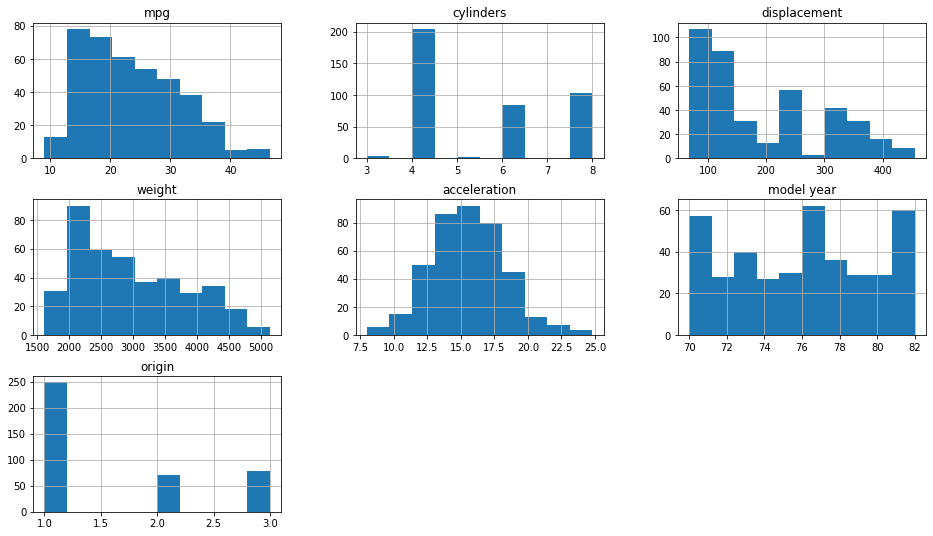

In [25]:
df.hist(figsize=(16,9))
plt.show()

In [85]:
df.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.106224
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64

In [26]:
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu


<AxesSubplot:xlabel='car name'>

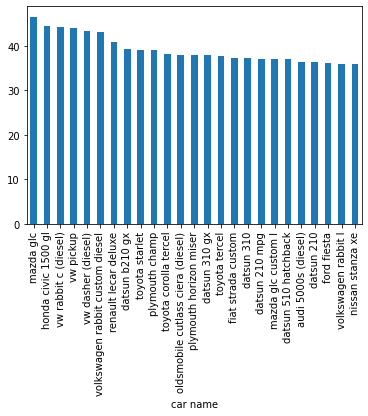

In [31]:
df.groupby('car name').mpg.mean().sort_values(ascending=False).head(25).plot(kind='bar')

<AxesSubplot:xlabel='car name'>

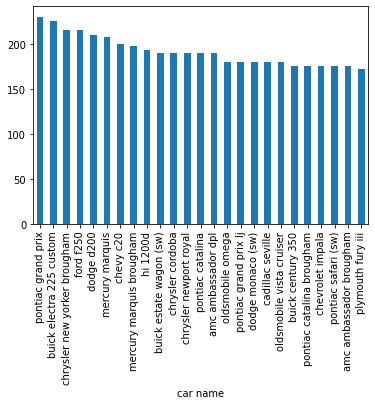

In [64]:
df.groupby('car name').horsepower.mean().sort_values(ascending=False).head(25).plot(kind='bar')

In [65]:
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu


<AxesSubplot:xlabel='cylinders', ylabel='count'>

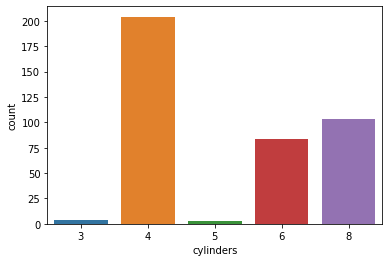

In [67]:
sns.countplot(x='cylinders',data=df)

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

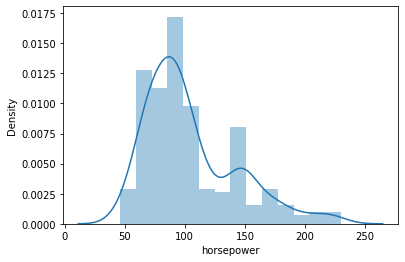

In [86]:
sns.distplot(df['horsepower'])

In [69]:
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu


<AxesSubplot:xlabel='model year', ylabel='mpg'>

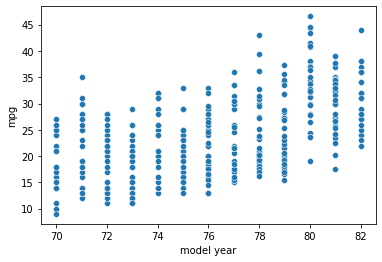

In [70]:
sns.scatterplot(x='model year',y='mpg',data=df)

<AxesSubplot:xlabel='model year', ylabel='mpg'>

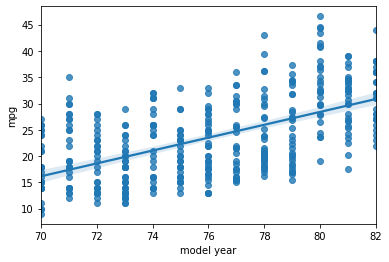

In [71]:
sns.regplot(x='model year',y='mpg',data=df)

<AxesSubplot:xlabel='horsepower'>

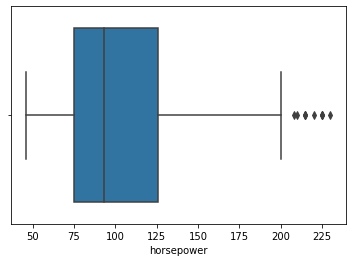

In [72]:
sns.boxplot(x='horsepower',data=df)

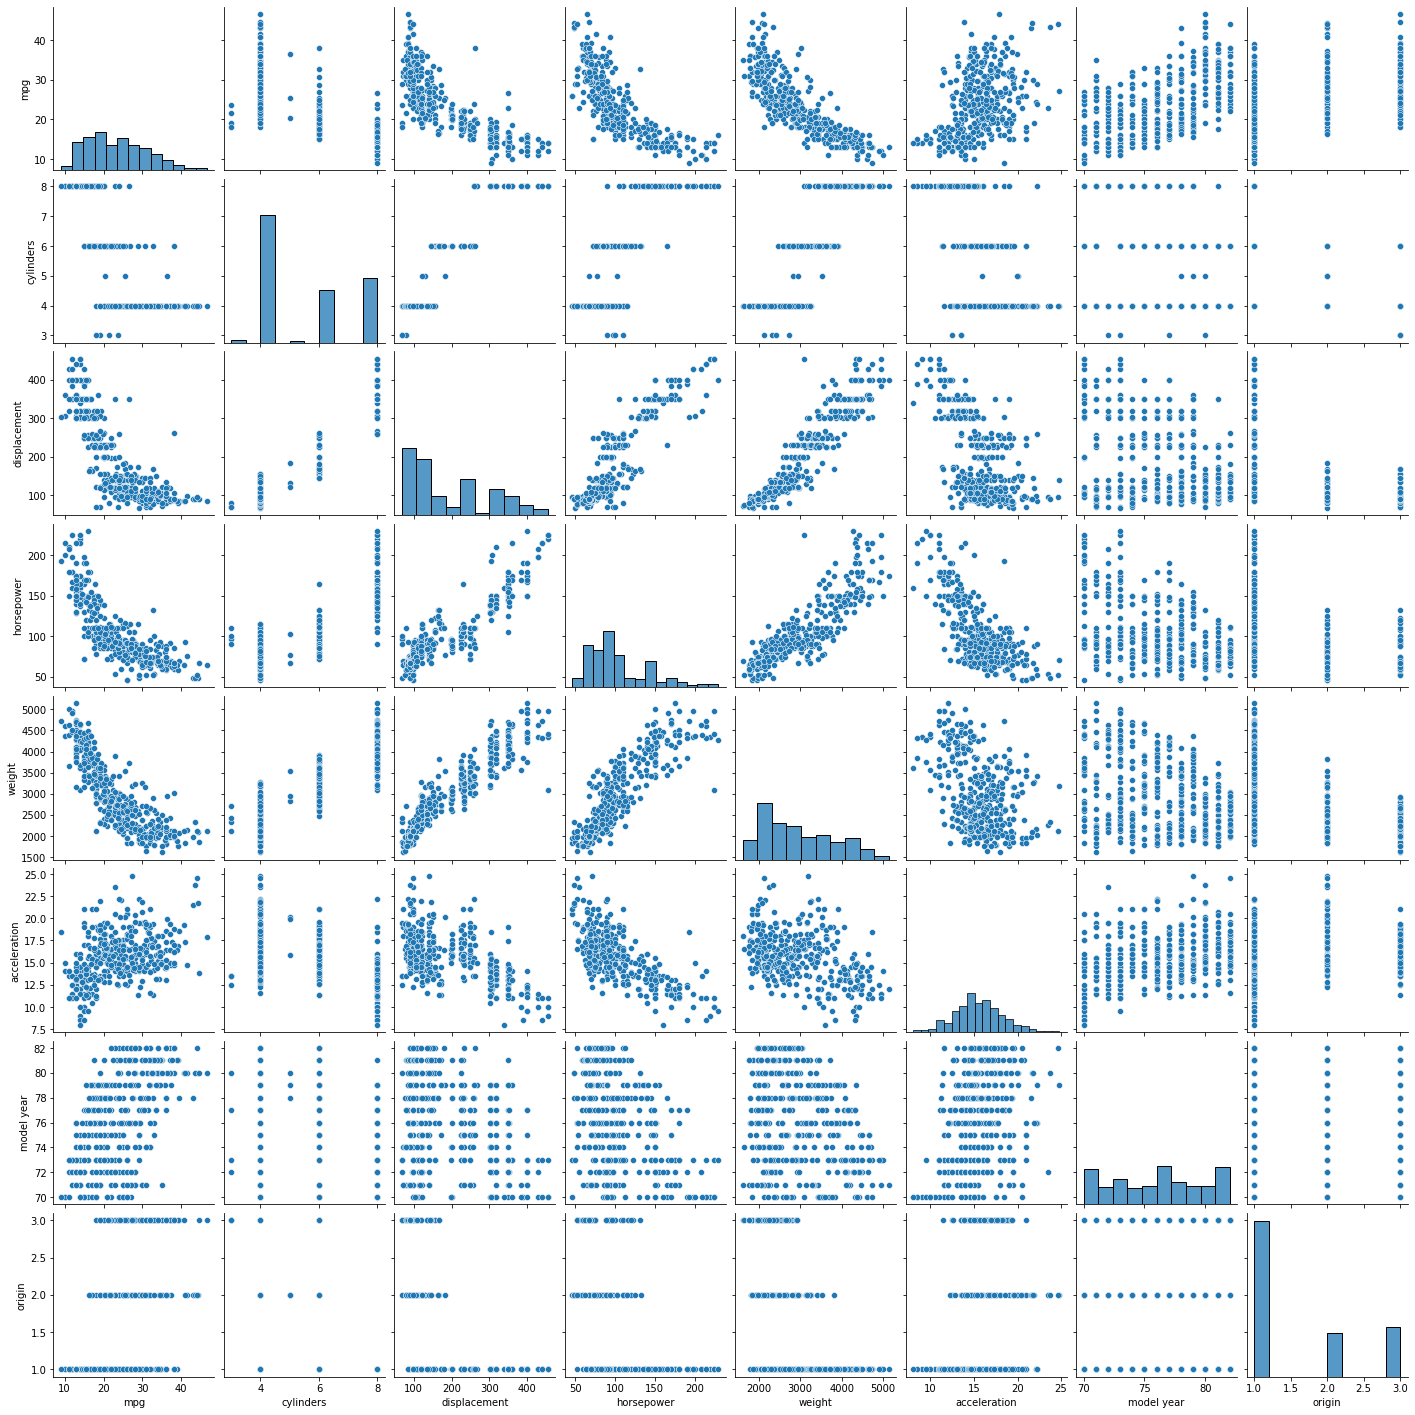

In [91]:
sns.pairplot(df)

<AxesSubplot:>

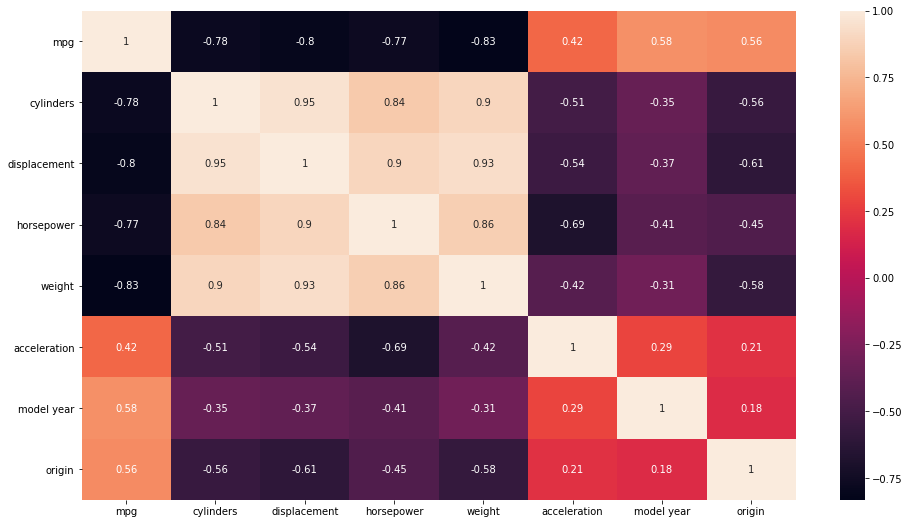

In [90]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#We can remove displacement becoz it is highly correlated with cylinders

In [73]:
df['horsepower'].isnull().sum()

6

In [98]:
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu


In [115]:
df.drop(columns='car name',inplace=True)

In [116]:
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1


In [117]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [121]:
df['origin']=df['origin'].replace({1:'India',2:'USA',3:'Germany'})

In [122]:
df['origin'].value_counts()

India      249
Germany     79
USA         70
Name: origin, dtype: int64

In [123]:
X=df.drop(columns='mpg',axis='columns')

In [128]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,India
1,8,350.0,165.0,3693,11.5,70,India
2,8,318.0,150.0,3436,11.0,70,India
3,8,304.0,150.0,3433,12.0,70,India
4,8,302.0,140.0,3449,10.5,70,India
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,India
394,4,97.0,52.0,2130,24.6,82,USA
395,4,135.0,84.0,2295,11.6,82,India
396,4,120.0,79.0,2625,18.6,82,India


In [132]:
Origin=pd.get_dummies(X['origin'],drop_first=True)

In [134]:
X=pd.concat([X,Origin],axis='columns')

In [135]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,India,USA
0,8,307.0,130.0,3504,12.0,70,India,1,0
1,8,350.0,165.0,3693,11.5,70,India,1,0
2,8,318.0,150.0,3436,11.0,70,India,1,0
3,8,304.0,150.0,3433,12.0,70,India,1,0
4,8,302.0,140.0,3449,10.5,70,India,1,0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,India,1,0
394,4,97.0,52.0,2130,24.6,82,USA,0,1
395,4,135.0,84.0,2295,11.6,82,India,1,0
396,4,120.0,79.0,2625,18.6,82,India,1,0


In [136]:
X.drop(columns='origin',inplace=True)

In [137]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,India,USA
0,8,307.0,130.0,3504,12.0,70,1,0
1,8,350.0,165.0,3693,11.5,70,1,0
2,8,318.0,150.0,3436,11.0,70,1,0
3,8,304.0,150.0,3433,12.0,70,1,0
4,8,302.0,140.0,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,0
394,4,97.0,52.0,2130,24.6,82,0,1
395,4,135.0,84.0,2295,11.6,82,1,0
396,4,120.0,79.0,2625,18.6,82,1,0


In [141]:
y=df1['mpg']

In [163]:
X

,cylinders,horsepower,weight,acceleration,model year,India,USA
0,8,130.0,3504,12.0,70,1,0
1,8,165.0,3693,11.5,70,1,0
2,8,150.0,3436,11.0,70,1,0
3,8,150.0,3433,12.0,70,1,0
4,8,140.0,3449,10.5,70,1,0
...,...,...,...,...,...,...,...
393,4,86.0,2790,15.6,82,1,0
394,4,52.0,2130,24.6,82,0,1
395,4,84.0,2295,11.6,82,1,0
396,4,79.0,2625,18.6,82,1,0


In [164]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [167]:
scaler=StandardScaler()

In [168]:
X_train=scaler.fit_transform(X_train)

In [169]:
X_test=scaler.transform(X_test)

In [ ]:
#model Selection

In [345]:
rfr=RandomForestRegressor()

In [346]:
rfr_scores=cross_val_score(rfr,X_train,y_train,scoring='r2',cv=10,n_jobs=-1)

In [347]:
rfr_scores

array([0.87993548, 0.83399107, 0.80258417, 0.79503144, 0.86511159,
       0.91956639, 0.87520181, 0.92229997, 0.8927444 , 0.7786463 ])

In [348]:
rfr_scores.mean()

0.8565112600388234

In [371]:
print('Bias Error',np.mean(1-rfr_scores))

Bias Error 0.14348873996117667


In [372]:
print('Variance Error',np.std(rfr_scores,ddof=1))

Variance Error 0.05147485950048801


In [329]:
xgb=XGBRegressor()

In [330]:
xgb_scores=cross_val_score(xgb,X_train,y_train,scoring='r2',cv=10,n_jobs=-1)

In [331]:
xgb_scores

array([0.82948149, 0.80425914, 0.79623477, 0.81210399, 0.84770954,
       0.92044238, 0.81614933, 0.90418283, 0.75441591, 0.73819157])

In [332]:
xgb_scores.mean()

0.8223170954499341

In [317]:
Dtr=DecisionTreeRegressor()

In [318]:
Dtr_scores=cross_val_score(Dtr,X_train,y_train,scoring='r2',cv=10,n_jobs=-1)

In [319]:
Dtr_scores

array([0.65368792, 0.7982953 , 0.61224863, 0.60702942, 0.82861744,
       0.8687589 , 0.80094807, 0.86595102, 0.79289439, 0.71644482])

In [320]:
Dtr_scores.mean()

0.7544875903325069

In [245]:
svr=SVR()

In [246]:
svr=cross_val_score(svr,X_train,y_train,scoring='r2',cv=10,n_jobs=-1)

In [247]:
svr

array([0.88105013, 0.76344417, 0.81169707, 0.7648258 , 0.84231317,
       0.79838479, 0.79625486, 0.91363816, 0.77723665, 0.82247064])

In [248]:
svr.mean()

0.8171315441521758

In [353]:
knnr=KNeighborsRegressor()

In [354]:
knnr=cross_val_score(knnr,X_train,y_train,scoring='r2',cv=10,n_jobs=-1)

In [355]:
knnr

array([0.85661719, 0.86008931, 0.79407536, 0.75929288, 0.8852644 ,
       0.86366827, 0.76706885, 0.89912393, 0.87758882, 0.83849631])

In [356]:
knnr.mean()

0.840128532718901

In [367]:
#Hyperparametertuning on best model and model building

In [268]:
parametersGrid  = {'max_depth': [5, 6, 7],
                  'n_estimators':[500, 800, 1000]}

rfr=RandomForestRegressor()
rfrgs = GridSearchCV(rfr,
                   parametersGrid,
                   cv = 10,n_jobs=-1)

In [270]:
rfrgs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'n_estimators': [500, 800, 1000]})

In [271]:
print("\n The best estimator across ALL searched params:\n",rfrgs.best_estimator_)
print("\n The best score across ALL searched params:\n",rfrgs.best_score_)
print("\n The best parameters across ALL searched params:\n",rfrgs.best_params_)


 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=7, n_estimators=1000)

 The best score across ALL searched params:
 0.8566195617343789

 The best parameters across ALL searched params:
 {'max_depth': 7, 'n_estimators': 1000}


In [273]:
RF=RandomForestRegressor(max_depth= 7, n_estimators= 1000,n_jobs=-1)

In [274]:
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1)

In [275]:
y_train_pred=RF.predict(X_train)

In [376]:
r2_score(y_train,y_train_pred)

0.9923526593144069

In [377]:
mean_squared_error(y_train,y_train_pred)

0.4610105241675746

In [378]:
RMSE_Train=mean_squared_error(y_train,y_train_pred)**0.5

In [379]:
RMSE_Train

0.6789775579263092

In [380]:
y_test_pred=RF.predict(X_test)

In [381]:
r2_score(y_test,y_test_pred)

0.8836772173418808

In [382]:
mean_squared_error(y_test,y_test_pred)

7.381538440179767

In [383]:
RMSE_Test=mean_squared_error(y_test,y_test_pred)**0.5

In [384]:
RMSE_Test

2.716898680514194

In [ ]:
# if RMSE_Train size is less than RMSE_Test then OverFitting
# if RMSE_Train size is more than RMSE_Test then UnderFitting